In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bmb1 = '/Users/eva/Desktop/ALLDATABMB/b.e11.B20TRLENS_RCP85.f09_g16.xbmb.001.pop.h.MOC.192001-202912.nc'
nc1 = Dataset(bmb1)
MOC1 = nc1.variables['MOC']

moc_z = nc1.variables['moc_z']
lat_aux_grid = nc1.variables['lat_aux_grid']

z_comp = moc_z[:]
latitude = lat_aux_grid[:]

In [3]:
def LinearRegression(x,y):
    n = len(x)
    x_avg = np.sum(x)/n
    y_avg = np.sum(y)/n

    Sxy = np.sum((x-x_avg).reshape(-1)*(y-y_avg).reshape(-1))
    Sx = np.sum((x-x_avg)**2)

    m = Sxy/Sx
    return m

In [ ]:
timeseries = [[0 for x in range(len(latitude))] for y in range(len(z_comp))] 
for i in range(len(latitude)):
    for j in range(len(z_comp)):
        timeseries[j][i] = MOC1[600:1020, 1, 0, j, i]

In [ ]:
mag_change = [[0 for x in range(len(latitude))] for y in range(len(z_comp))]

for i in range(len(latitude)):
    for j in range(len(z_comp)):
        m = LinearRegression(range(420),timeseries[j][i])
        mag_change[j][i] = m*420
        print(m*420)

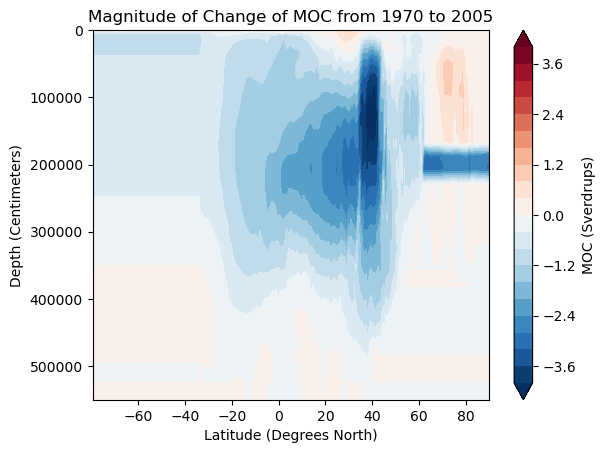

In [ ]:
plt.title ("Magnitude of Change of MOC from 1970 to 2005")
plt.xlabel("Latitude (Degrees North)")
plt.ylabel("Depth (Centimeters)")
levels = np.arange(-4, 4.4, 0.4)
plt.contourf(latitude, z_comp, mag_change, levels, cmap=plt.get_cmap('RdBu_r'), extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label = "MOC (Sverdrups)")
plt.show()